COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 254, done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 254 (delta 116), reused 183 (delta 59), pack-reused 0
Receiving objects: 100% (254/254), 2.31 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (116/116), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import helper_funcs as helper

In [3]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/Neural_Networks-101-demo/'

# get data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(model_root_dir+'MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/Neural_Networks-101-demo/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /content/Neural_Networks-101-demo/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /content/Neural_Networ

In [0]:
image_size = 28
num_classes = 10

In [0]:
# Hyperparams

batch_size = 100
learning_rate = 0.5

epochs = 2
iterations = mnist.train.num_examples//batch_size

In [0]:
tf.reset_default_graph()

In [0]:
# input placeholders
X_placeholder = tf.placeholder(shape=[None, image_size**2], dtype=tf.float32, name='X_placeholder')
Y_placeholder = tf.placeholder(shape=[None, num_classes], dtype=tf.int64, name='Y_placeholder')

In [0]:
# Variables
W = tf.Variable(np.zeros([image_size**2, num_classes]), dtype=tf.float32, name='W')
b = tf.Variable(np.ones(shape=[num_classes]), dtype=tf.float32, name='b')

In [0]:
# 1 fully connected layer
Y_prediction = tf.matmul(X_placeholder, W) + b

In [0]:
# loss function softmax cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_placeholder, logits=Y_prediction, name='loss'))

In [0]:
# optimizer
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [0]:
# accuracy
correct_prediction = tf.equal(tf.argmax(Y_prediction, 1), tf.argmax(Y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Initialize our session and vars
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [14]:
# initialize empty array to hold losses for each training step
losses = np.array([])

for epoch in range(epochs):
    print('New epoch', str(epoch+1)+'/'+str(epochs))
    for idx in range(iterations):

        # get batches of training data for current step
        batch_xs, batch_ys = mnist.train.next_batch(batch_size, shuffle=True)

        # run training step and get loss values to plot later
        _, _loss = sess.run([train_step, loss], 
                            feed_dict={
                                X_placeholder: batch_xs,
                                Y_placeholder: batch_ys
                            })

        if (idx+1) % (iterations/5) == 0:

            # get accuracy using validation set
            _accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.validation.images,
                                                      Y_placeholder : mnist.validation.labels
                                                     })

            # print current step, batch loss and validation accuracy
            print('step', str(idx+1)+'/'+str(iterations), 'loss', _loss, 'accuracy', str(round(100*_accuracy,2))+'%')

        # append the loss to the losses array to plot
        losses = np.append(losses, _loss)

New epoch 1/2
step 110/550 loss 0.33065575 accuracy 89.78%
step 220/550 loss 0.43642932 accuracy 89.7%
step 330/550 loss 0.4013327 accuracy 91.66%
step 440/550 loss 0.43054652 accuracy 90.88%
step 550/550 loss 0.42014706 accuracy 91.62%
New epoch 2/2
step 110/550 loss 0.40094116 accuracy 91.72%
step 220/550 loss 0.42852116 accuracy 91.32%
step 330/550 loss 0.44900322 accuracy 91.76%
step 440/550 loss 0.31263423 accuracy 92.08%
step 550/550 loss 0.356241 accuracy 92.2%


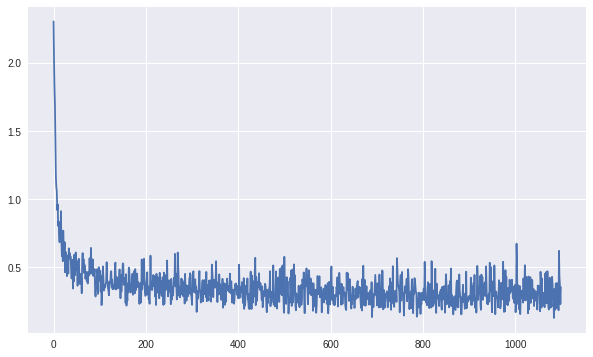

In [15]:
# plot training losses

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [16]:
# find accuracy on test set
_accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.test.images,
                                          Y_placeholder : mnist.test.labels
                                         })

print(str(round(100*_accuracy,2))+'%')

91.6%


prediction: 2 answer: 2
0 0.656%
1 0.002%
2 96.773%
3 0.365%
4 0.0%
5 0.69%
6 1.358%
7 0.0%
8 0.156%
9 0.0%


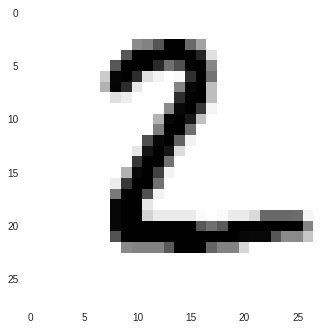

prediction: 6 answer: 6
0 0.838%
1 0.05%
2 3.666%
3 1.154%
4 0.406%
5 0.137%
6 80.374%
7 0.002%
8 13.318%
9 0.054%


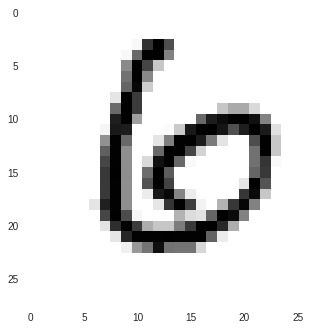

In [17]:
# show test images with prediction probabilities

test_idxs = [1,11]

for test_idx in test_idxs:
    # get input image and corresponding label
    test_x, test_y = mnist.test.images[test_idx], mnist.test.labels[test_idx]

    # make prediction
    _prediction = sess.run(Y_prediction, feed_dict={X_placeholder: test_x.reshape(1,-1)})

    # show prediction and true answer
    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    # show probabilities for all values
    for i,val in enumerate(_prediction[0]):
        print(i, str(round(100*np.exp(val)/np.sum(np.exp(_prediction)),3))+'%')

    # plot test image
    plt.imshow(test_x.reshape(image_size,image_size), cmap='binary')
    plt.grid(False)
    plt.show()